# Midterm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session, Options

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=0.8)

In [2]:
output_path = Path() / "final_output"
output_path.mkdir(parents=True, exist_ok=True)

service = QiskitRuntimeService(channel="ibm_quantum")
backend_sim = service.get_backend("ibmq_qasm_simulator")
backend_qc = service.least_busy(simulator=False)

In [3]:
n_bits = 3
numbers = np.arange(2 ** n_bits)
for i in numbers:
    j = np.binary_repr(i, width=n_bits)
    print(f"{i} ---> {j}")

0 ---> 000
1 ---> 001
2 ---> 010
3 ---> 011
4 ---> 100
5 ---> 101
6 ---> 110
7 ---> 111


## Step 1

In [4]:
def increment_1_circuit(i):
    j = np.binary_repr(i, width=3)
    sv = Statevector.from_label(j).data
    circuit = QuantumCircuit(3)
    circuit.initialize(sv, circuit.qubits)
    circuit.cnot(0, 1)
    circuit.x(1)
    circuit.ccx(0, 1, 2)
    circuit.x([0, 1])
    circuit.measure_all()
    return circuit

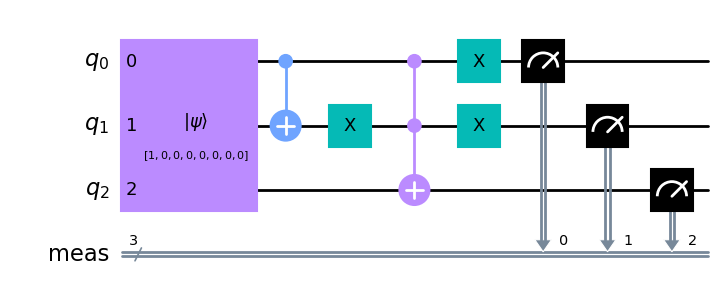

In [5]:
circuit_example_1 = increment_1_circuit(0)
circuit_example_1.draw("mpl", plot_barriers=False, filename=output_path / "circuit_increment_1.png")

In [6]:
# Simulator
with Session(service=service, backend=backend_sim) as session_sim:
    sampler_1_sim = Sampler(session=session_sim)
    job_1_sim = sampler_1_sim.run([increment_1_circuit(i) for i in numbers] )
    result_1_sim = job_1_sim.result()
df_1_sim = pd.DataFrame.from_dict(dict(zip(numbers, result_1_sim.quasi_dists)))
df_1_sim.to_csv(output_path / "quasi_dists_1_sim.csv")

In [7]:
# Quantum Computer
with Session(service=service, backend=backend_qc) as session_qc:
    sampler_1_qc = Sampler(session=session_qc)
    job_1_qc = sampler_1_qc.run([increment_1_circuit(i) for i in numbers] )
    result_1_qc = job_1_qc.result()
df_1_qc = pd.DataFrame.from_dict(result_1_qc.quasi_dists).set_index(numbers)
df_1_qc.to_csv(output_path / "quasi_dists_1_qc.csv")

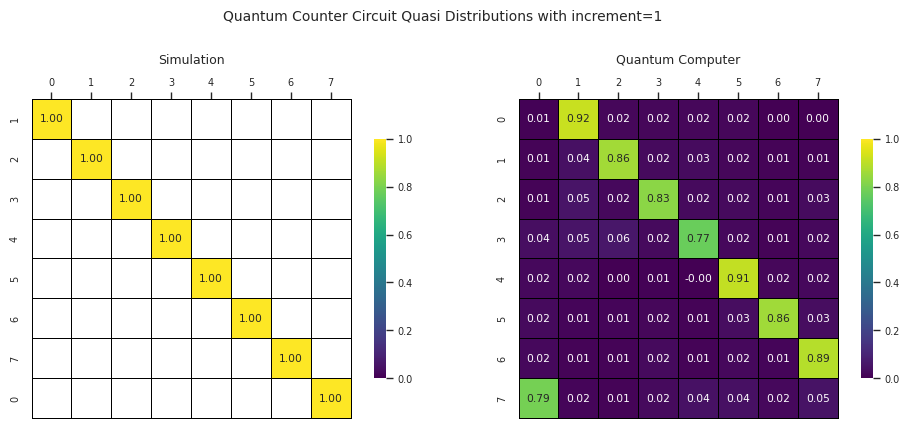

In [16]:
with sns.axes_style("white"):
    fig, (ax_sim, ax_qc) = plt.subplots(ncols=2, figsize=(10, 4))
    sns.heatmap(
        df_1_sim,
        annot=True,
        fmt=".2f",
        vmin=0,
        vmax=1,
        cmap="viridis",
        square=True,
        cbar=True,
        cbar_kws={"shrink": .75,},
        linewidth=0.5,
        linecolor="black",
        clip_on=False,
        ax=ax_sim
    )
    sns.heatmap(
        df_1_qc,
        annot=True,
        fmt=".2f",
        vmin=0,
        vmax=1,
        cmap="viridis",
        square=True,
        cbar=True,
        cbar_kws={"shrink": .75,},
        linewidth=0.5,
        linecolor="black",
        clip_on=False,
        ax=ax_qc
    )
    ax_sim.xaxis.tick_top()
    ax_qc.xaxis.tick_top()
    ax_sim.set_title("Simulation", fontsize=9, pad=10)
    ax_qc.set_title("Quantum Computer", fontsize=9, pad=10)
    fig.suptitle("Quantum Counter Circuit Quasi Distributions with increment=1", y=1.05, fontsize=10)
    fig.tight_layout()
    fig.savefig(output_path / "quasi_dist_1_sim_qc.png", dpi=300)


In [30]:
df_increment_1 = pd.DataFrame(
    {
        "sim_output": df_1_sim.apply(pd.Series.argmax, axis=1),
        "sim_prob": df_1_sim.max(axis=1),
        "qc_output": df_1_qc.apply(pd.Series.argmax, axis=1),
        "qc_prob": df_1_qc.max(axis=1)
    }
)

In [32]:
print(
    df_increment_1.to_latex(
        label="tab:output_increment_1", 
        caption="Truth table for increment=1",
        float_format="%.3f",
    )
)

\begin{table}
\caption{Truth table for increment=1}
\label{tab:output_increment_1}
\begin{tabular}{lrrrr}
\toprule
 & sim_output & sim_prob & qc_output & qc_prob \\
\midrule
0 & 7 & 1.000 & 1 & 0.916 \\
1 & 0 & 1.000 & 2 & 0.859 \\
2 & 1 & 1.000 & 3 & 0.825 \\
3 & 2 & 1.000 & 4 & 0.771 \\
4 & 3 & 1.000 & 5 & 0.910 \\
5 & 4 & 1.000 & 6 & 0.857 \\
6 & 5 & 1.000 & 7 & 0.888 \\
7 & 6 & 1.000 & 0 & 0.793 \\
\bottomrule
\end{tabular}
\end{table}



## Step 2

In [9]:
def increment_3_circuit(i):
    j = np.binary_repr(i, width=3)
    sv = Statevector.from_label(j).data
    circuit = QuantumCircuit(3)
    circuit.initialize(sv, circuit.qubits)
    circuit.cnot(0, 1)
    circuit.x(1)
    circuit.ccx(0, 1, 2)
    circuit.x(0)
    circuit.cnot(0, 1)
    circuit.ccx(0, 1, 2)
    circuit.x(0)
    circuit.cnot(0, 1)
    circuit.ccx(0, 1, 2)
    circuit.x([0, 1])
    circuit.measure_all()
    return circuit

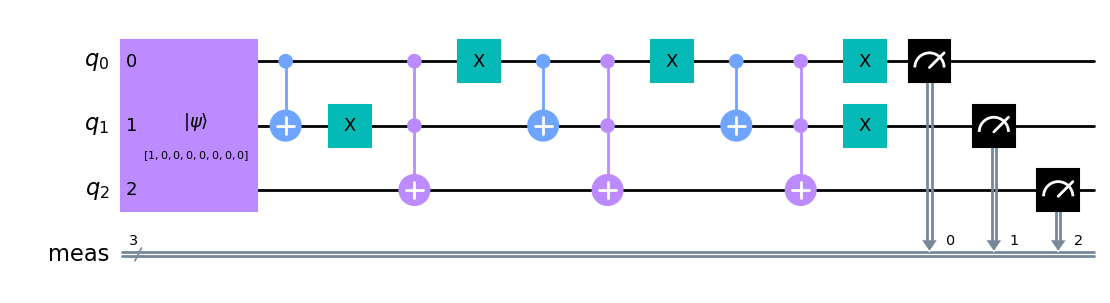

In [10]:
circuit_example_3 = increment_3_circuit(0)
circuit_example_3.draw("mpl", plot_barriers=False, filename=output_path / "circuit_increment_3.png")

In [11]:
# Simulator
with Session(service=service, backend=backend_sim) as session_sim:
    sampler_3_sim = Sampler(session=session_sim)
    job_3_sim = sampler_3_sim.run([increment_3_circuit(i) for i in numbers] )
    result_3_sim = job_3_sim.result()
df_3_sim = pd.DataFrame.from_dict(dict(zip(numbers, result_3_sim.quasi_dists)))
df_3_sim.to_csv(output_path / "quasi_dists_3_sim.csv")

In [12]:
# Quantum Computer
with Session(service=service, backend=backend_qc) as session_qc:
    sampler_3_qc = Sampler(session=session_qc)
    job_3_qc = sampler_3_qc.run([increment_3_circuit(i) for i in numbers] )
    result_3_qc = job_3_qc.result()
df_3_qc = pd.DataFrame.from_dict(result_3_qc.quasi_dists).set_index(numbers)
df_3_qc.to_csv(output_path / "quasi_dists_3_qc.csv")

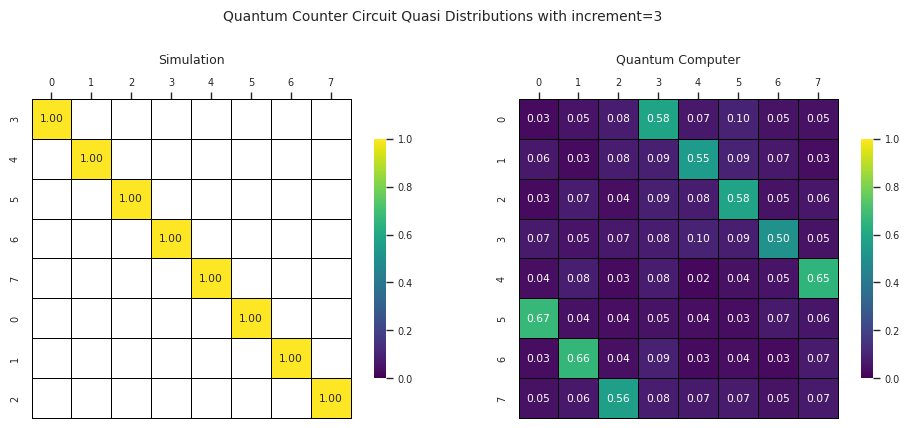

In [15]:
with sns.axes_style("white"):
    fig, (ax_sim, ax_qc) = plt.subplots(ncols=2, figsize=(10, 4))
    sns.heatmap(
        df_3_sim,
        annot=True,
        fmt=".2f",
        vmin=0,
        vmax=1,
        cmap="viridis",
        square=True,
        cbar=True,
        cbar_kws={"shrink": .75,},
        linewidth=0.5,
        linecolor="black",
        clip_on=False,
        ax=ax_sim
    )
    sns.heatmap(
        df_3_qc,
        annot=True,
        fmt=".2f",
        vmin=0,
        vmax=1,
        cmap="viridis",
        square=True,
        cbar=True,
        cbar_kws={"shrink": .75,},
        linewidth=0.5,
        linecolor="black",
        clip_on=False,
        ax=ax_qc
    )
    ax_sim.xaxis.tick_top()
    ax_qc.xaxis.tick_top()
    ax_sim.set_title("Simulation", fontsize=9, pad=10)
    ax_qc.set_title("Quantum Computer", fontsize=9, pad=10)
    fig.suptitle("Quantum Counter Circuit Quasi Distributions with increment=3", y=1.05, fontsize=10)
    fig.tight_layout()
    fig.savefig(output_path / "quasi_dist_3_sim_qc.png", dpi=300)


In [33]:
df_increment_3 = pd.DataFrame(
    {
        "sim_output": df_3_sim.apply(pd.Series.argmax, axis=1),
        "sim_prob": df_3_sim.max(axis=1),
        "qc_output": df_3_qc.apply(pd.Series.argmax, axis=1),
        "qc_prob": df_3_qc.max(axis=1)
    }
)

In [34]:
print(
    df_increment_3.to_latex(
        label="tab:output_increment_3",
        caption="Truth table for increment=3",
        float_format="%.3f",
    )
)

\begin{table}
\caption{Truth table for increment=3}
\label{tab:output_increment_3}
\begin{tabular}{lrrrr}
\toprule
 & sim_output & sim_prob & qc_output & qc_prob \\
\midrule
0 & 5 & 1.000 & 3 & 0.585 \\
1 & 6 & 1.000 & 4 & 0.546 \\
2 & 7 & 1.000 & 5 & 0.578 \\
3 & 0 & 1.000 & 6 & 0.502 \\
4 & 1 & 1.000 & 7 & 0.648 \\
5 & 2 & 1.000 & 0 & 0.671 \\
6 & 3 & 1.000 & 1 & 0.662 \\
7 & 4 & 1.000 & 2 & 0.561 \\
\bottomrule
\end{tabular}
\end{table}

